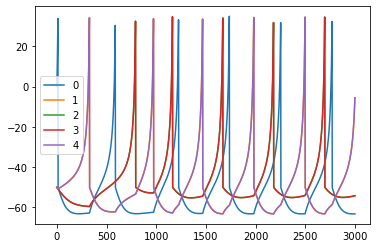

In [379]:

def coupled_neurons(f,N,v0,u0,h,t0,t1,I0,k):
    N = 5
    connection_matrix = [ [0,k,0,0,k] , [k,0,k,0,0] , [0,k,0,k,0] , [0,0,k,0,k] , [k,0,0,k,0] ]
    time_range = np.linspace(t0,t1,int((t1-t0)/h))
    v_list = [[v0 for j in range(len(time_range)+1)] for i in range(N)]
    v_list[0][0] = v0
    u_list = [[0 for j in range(len(time_range)+1)] for i in range(N)]
    v_list[0][0] = u0
    I_list = [[0 for j in range(len(time_range)+1)] for i in range(N)]
    I_list[0][0] = I0
    
    for t in range(len(time_range)):
        for n in range(N):    
            v = v_list[n][t]
            u = u_list[n][t]
            I = I_list[n][t]
            v_tilde = v + h*f(v,u,I)[0]
            u_tilde = u + h*f(v,u,I)[1]
            v += 0.5*h*(f(v,u,I)[0]+f(v_tilde,u_tilde,I)[0]) 
            u += 0.5*h*(f(v,u,I)[1]+f(v_tilde,u_tilde,I)[1]) 
            if v<=35:
                v_list[n][t+1] = v
                u_list[n][t+1] = u
                I_list[n][t+1] += I
            elif v>35:
                v_list[n][t+1] = -50
                u_list[n][t+1] = u+100
                for m in range(N):
                    t_pulse = 0.1 #sec is the duration of a pulse
                    for i in range(int(t_pulse/h)):
                        I_list[m][t+1+i] += connection_matrix[n][m] * I0
        #if I_list[0][t+1] == 0: #does the fist neuron need to get a continuous spike?
        #    I_list[0][t+1] = I0
    return v_list,u_list,I_list #v_list[n][t] gives the voltage of neuron n on time t. This means v_list[n] gives its voltage evolving over time 


v,u,I = coupled_neurons(f,3,-50,0,0.1,0,300,200,0.5)
for i in range(5):
    plt.plot(v[i], label=i)
plt.legend()

plt.eventplot(v[0])


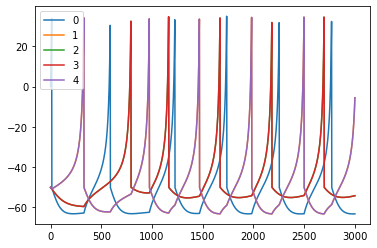

In [371]:
v,u,I = coupled_neurons(f,3,-50,0,0.1,0,300,200,0.5)
for i in range(5):
    plt.plot(v[i], label=i)
plt.legend()


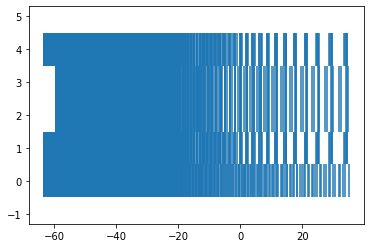

In [381]:
plt.eventplot(v)

